Look at the M2 surface tidal ellipses in the CODAR region (including the new CODAR at Active Pass)

In [1]:
import datetime
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio

from salishsea_tools import viz_tools
from salishsea_tools import ellipse
from nowcast.figures import research_VENUS

import baroclinic as bc
%matplotlib inline

In [2]:
SITES = research_VENUS.SITES['VENUS']

CODAR/CODAR
BP


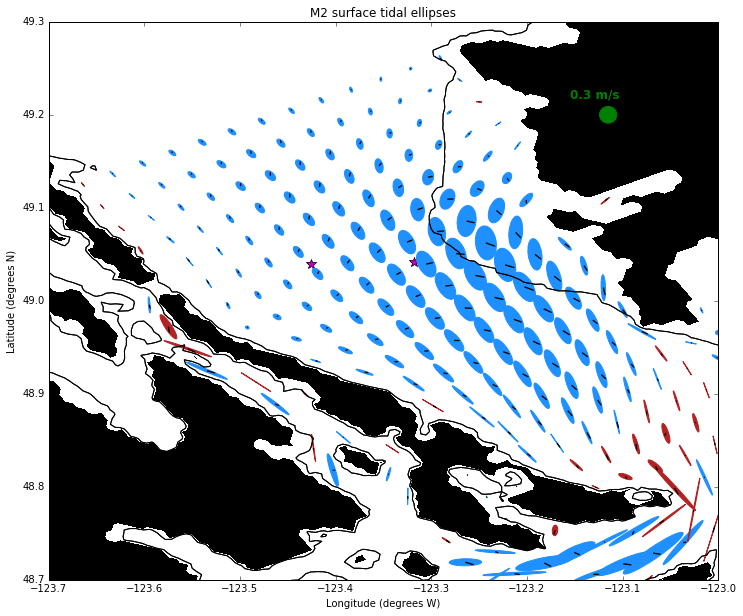

In [3]:
const='M2'
sc_ell=0.06
st=6
sc_quiv =25
time_deg = 31 #M2 phase of elevation at Point Atkinson
fig,ax = plt.subplots(1,1,figsize=(12,10))
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
depths = mesh_mask.variables['gdept_0']
areas = ['CODAR/CODAR','BP' ]

for area in areas:
    print(area)
    data =sio.loadmat(
        '/ocean/nsoontie/MEOPAR/TidalEllipseData/{}_region_surface_20160622_20160825.mat'.format(area))
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    
    bc.plot_CODAR_ellipse(ax,lons, lats, const, datastruc,depths, grid, scale=sc_ell, step=st,
                          baroclinic=False, barotropic=False, depth_level=0, isobaths=[20])
    bc.plot_ellipse_phase_arrow(ax, lons, lats, const, datastruc, time_deg, 
                                scale=sc_quiv, step=st, baroclinic=False)
    ax.plot(SITES['Central']['lon'], SITES['Central']['lat'], 'm*', label='Central',ms=10,zorder=1)
    ax.plot(SITES['East']['lon'], SITES['East']['lat'], 'm*',label = 'East',ms=10,zorder=1)
    
#Axis limits
ax.set_xlim([-123.7,-123])
ax.set_ylim([48.7,49.3])
bc.add_scale_ellipse(ax, -123.115,49.2, dx=-.04, dy=0.018,scale = sc_ell, speed=0.3)
ax.get_xaxis().get_major_formatter().set_useOffset(False)

In [4]:
fig.savefig('M2_surface_ellipses_20160622_20160825.png', dpi=300,bbox_inches='tight')